# Covid 19 Data Analysis


In [14]:
# Importing the relevant libraries

# matplotlib settings
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [15]:
# importing data from the different dataframes
country_wise_latest = pd.read_csv(
    r"C:\Users\Ogidan\Desktop\hope\data sets\Covid_Analysis\country_wise_latest.csv"
)

day_wise = pd.read_csv(
    r"C:\Users\Ogidan\Desktop\hope\data sets\Covid_Analysis\day_wise.csv"
)



In [16]:
country_wise_latest.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [17]:
country_wise_latest.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [18]:
country_wise_latest.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [19]:
country_wise_latest.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [20]:
# create a copy of the original dataframe
country_wise_copy = country_wise_latest.copy()

# Exploratory Analysis and Visualization

# Country

let us take a look at the countries with the heighest deaths

In [21]:
# we are sorting the country column by the confirmed coulmn
death_dist = (
    country_wise_copy[["Country/Region", "Confirmed"]]
    .sort_values("Confirmed", ascending=False)
    .set_index("Country/Region")
    .head(10)
)

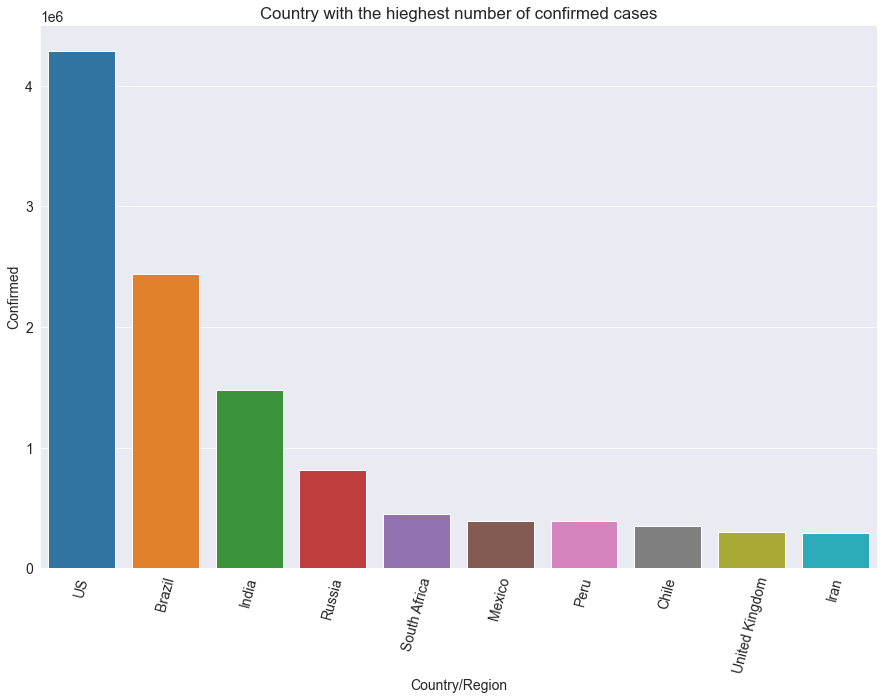

In [22]:
#plotting the top 10 contries with the highest number of confirmed cases

plt.figure(figsize=(15, 10))
plt.xticks(rotation=75)
plt.title("Country with the hieghest number of confirmed cases")
sns.barplot(x=death_dist.index, y=death_dist["Confirmed"]);

From this plot, we can see the top 10 countries with the hieghest number of confirmed cases

# WHO regions

let us examine who regions with the lowest  and heighest occurence of the virus

In [23]:
who_counts = country_wise_copy["WHO Region"].value_counts()

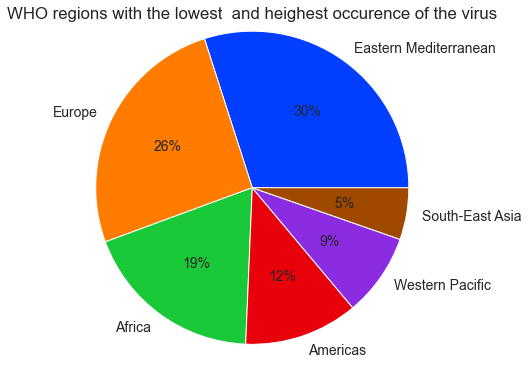

In [24]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=30)

keys = country_wise_copy["WHO Region"].unique()
palette_color = sns.color_palette("bright")

plt.pie(
    who_counts,
    normalize=True,
    radius=1.2,
    colors=palette_color,
    labels=keys,
    autopct="%.0f%%",
);

plt.title('WHO regions with the lowest  and heighest occurence of the virus');

From the piechart, we can see that the WHO region with the hieghest occurence of the virus is the Eastern mediterranean while the WHO region with the lowest occurence of the virus is the south-east Asia region 

<!-- @let us examine who regions with the lowest  and heighest death cases  -->

# Questions

### 1. Top 10 of  countries has the hieghest and lowest proportion of people that recovered

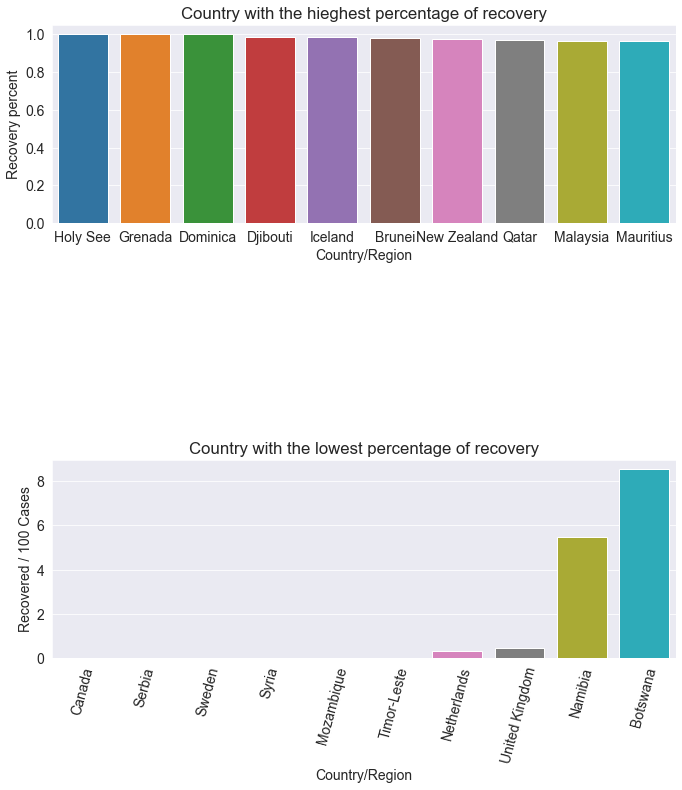

In [25]:
# this is to find the countries with the country wuth the heighest propotion of people that recovered
country_wise_copy["recov_percent"] = (
    country_wise_copy["Recovered"] / country_wise_copy["Confirmed"]
)

recov_dist = (
    country_wise_copy[["Country/Region", "recov_percent"]]
    .sort_values("recov_percent", ascending=False)
    .set_index("Country/Region")
    .head(10)
)


# this is to find the countries with the country with the lowest propotion of people that recovered

low_recov_dist = (
    country_wise_copy[["Country/Region", "Recovered / 100 Cases"]]
    .sort_values("Recovered / 100 Cases", ascending=True)
    .set_index("Country/Region")
    .head(10)
)


# this lines are to plot the relationships
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
plt.tight_layout(pad=15)


axes[0].set_title("Country with the hieghest percentage of recovery")
sns.barplot(x=recov_dist.index, y=recov_dist["recov_percent"], ax=axes[0]);
axes[0].set_ylabel('Recovery percent')
# axes[0].title('Country with the hieghest percentage of recovery')

axes[1].set_title("Country with the lowest percentage of recovery")
axes[1].set_ylabel('Recovery percent')
plt.xticks(rotation=75)
sns.barplot(
    x=low_recov_dist.index, y=low_recov_dist["Recovered / 100 Cases"], ax=axes[1]
);

From the graph, we can observe:

1.The proportion of people that recovered from the virus is significantly high for most countries and they didn't vary much from eachother 

2.The countries with the lowest proportion of survivals are canada, Serbia, Sweeden, India , mozabique, etc

### 2. Top 10 countries with the hieghest  proportion of people that died

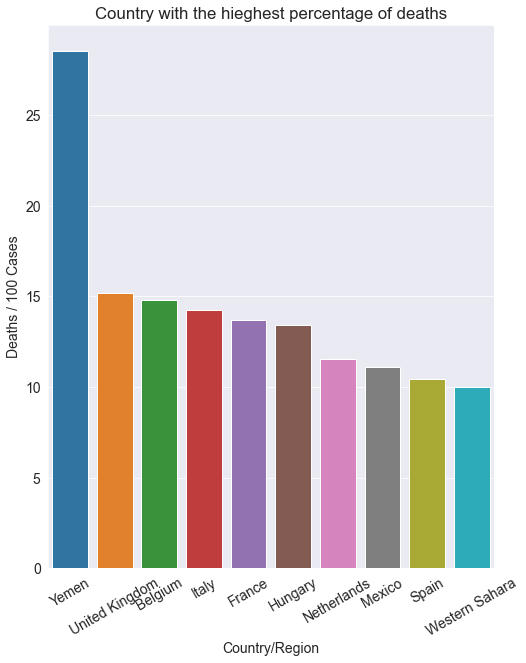

In [26]:
# this is to find the countries with the country wuth the heighest propotion of people that died


death_dist = (
    country_wise_copy[["Country/Region", "Deaths / 100 Cases"]]
    .sort_values("Deaths / 100 Cases", ascending=False)
    .set_index("Country/Region")
    .head(10)
)


# this is to find the countries with the country with the lowest propotion of people that recovered

low_death_dist = (
    country_wise_copy[["Country/Region", "Deaths / 100 Cases"]]
    .sort_values("Deaths / 100 Cases", ascending=True)
    .set_index("Country/Region")
    .head(10)
)


# # this lines are to plot the relationships
# fig, axes = plt.subplots(2,1, figsize=(18,20))
# plt.tight_layout(pad=15)


plt.figure(figsize=(8,10))
plt.xticks(rotation=30)
plt.title("Country with the hieghest percentage of deaths")
sns.barplot(x=death_dist.index, y=death_dist["Deaths / 100 Cases"]);
# axes[0].title('Country with the hieghest percentage of recovery')


From the graph, we can observe:

The countries with the hieghest proportion of death per 100 cases are united kingdom, yemen, italy, belgium,etc


#### I will also be analysing data from the daywise dataset to gain more insight on the virus

In [27]:
day_wise.head()



,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [28]:
day_wise.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [29]:
day_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


### Data cleaning and preparation

In [30]:
# change the date column to a date and time type

day_wise["Date"] = pd.to_datetime(day_wise["Date"])

# Extract date features
def extract_date_info(df, cols):
    for feat in cols:
        df[feat + "_year"] = df[feat].dt.year
        df[feat + "_day"] = df[feat].dt.day
        df[feat + "_month"] = df[feat].dt.month
        df[feat + "_quarter"] = df[feat].dt.quarter
        df[feat + "_weekday"] = df[feat].dt.weekday
        df[feat + "_week"] = df[feat].dt.isocalendar().week
    # df.drop(columns=cols,axis=1,inplace=True)


extract_date_info(day_wise, ["Date"])

In [31]:
# mapping the days of the week and months of the year to their respective date time column

date_dic = {
    1: "january",
    2: "february",
    3: "march",
    4: "april",
    5: "may",
    6: "june",
    7: "july",
    8: "august",
    9: "september",
    10: "october",
    11: "november",
    12: "december",
}


day_date_dic = {
    1: "monday",
    2: "tuesday",
    3: "wedneday",
    4: "thursday",
    5: "friday",
    6: "saturday",
    7: "sunday",
}


day_wise["Date_weekday"] = day_wise["Date_weekday"].map(day_date_dic)
day_wise["Date_month"] = day_wise["Date_month"].map(date_dic)

### Data exploration and analysis

In [32]:
Trend_data = day_wise.groupby(["Date","Date_month","Date_weekday"])[["Deaths",'Recovered','Confirmed','New recovered']].mean().reset_index()


# d.sort_values()
                            
Trend_data

,Date,Date_month,Date_weekday,Deaths,Recovered,Confirmed,New recovered
0,2020-01-22,january,tuesday,17.0,28.0,555.0,0.0
1,2020-01-23,january,wedneday,18.0,30.0,654.0,2.0
2,2020-01-24,january,thursday,26.0,36.0,941.0,6.0
3,2020-01-25,january,friday,42.0,39.0,1434.0,3.0
4,2020-01-26,january,saturday,56.0,52.0,2118.0,13.0
...,...,...,...,...,...,...,...
156,2020-07-22,july,tuesday,623540.0,8541255.0,15227725.0,176269.0
157,2020-07-23,july,wedneday,633506.0,8710969.0,15510481.0,169714.0
158,2020-07-24,july,thursday,639650.0,8939705.0,15791645.0,228736.0
159,2020-07-25,july,friday,644517.0,9158743.0,16047190.0,219038.0


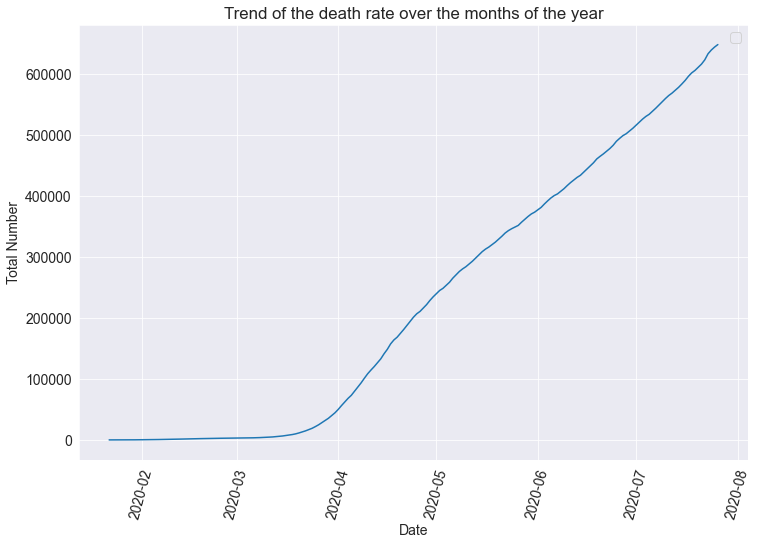

In [33]:
#show how the death rate varies along the months of the year

plt.figure(figsize=(12, 8))
plt.xticks(rotation=75)
plt.title("Trend of the death rate over the months of the year")
plt.xlabel('Date')
plt.ylabel('Total Number')
plt.legend(["Deaths","Recovered"])
plt.plot(Trend_data['Date'],Trend_data["Deaths"],);

#there was a sharp shoot up of the virus in the fourth month which is the month of march

In [34]:
#I have defined a function to help plot the trends in the data

def plot_timeseries(axes, x, y, color, xlabel, ylabel,marker = None, linetype=None):
  axes.plot(x,y, color= color, marker= marker,)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

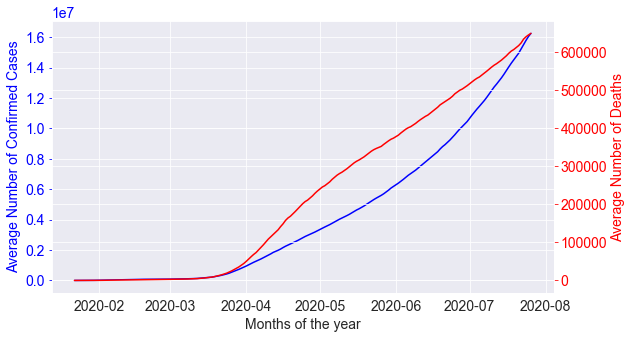

In [35]:
#show the trend of the death rate and the recovery rate

fig,ax = plt.subplots()

plot_timeseries(ax,Trend_data['Date'], Trend_data["Confirmed"], 'blue', 'Months of the year', 'Average Number of Confirmed Cases',)

ax2 = ax.twinx()
plot_timeseries(ax2,Trend_data['Date'], Trend_data["Deaths"], 'red', 'Months of the year', 'Average Number of Deaths')



#there was a sharp shoot up of the virus in the fourth month which is the month of march
#the difference between the number of confirmed cases and the number of deaths was quite clode when the virus fist started spreading but there became a wide gap 
#betwen them in the month of march

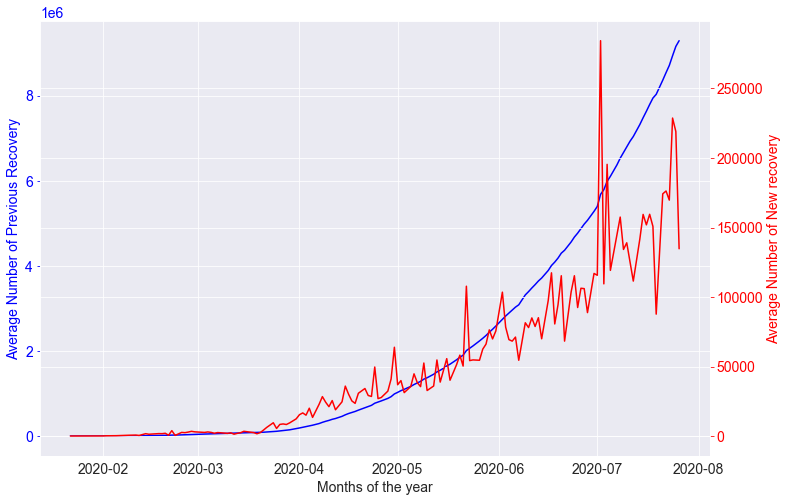

In [36]:


fig,ax = plt.subplots(figsize=(12, 8))
plot_timeseries(ax,Trend_data['Date'], Trend_data["Recovered"], 'blue', 'Months of the year', 'Average Number of Previous Recovery',)
ax3 = ax.twinx()
plot_timeseries(ax3,Trend_data['Date'], Trend_data["New recovered"], 'red', 'Months of the year', 'Average Number of New recovery')

This graph show the difference between the number of people that recovered from the virus at first  and the number of people that recovered newly. We can see that there is a large gap between them